In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [37]:
path=r'./house_to_module2.csv'
df=pd.read_csv(path)
df.drop(['Unnamed: 0'],inplace=True,axis=1)
print('Done')

Done


In [38]:
lr=LinearRegression()
x=df[['Crime_rate']];
y=df['Price']
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
yhat=lr.predict(x)
print('slope=',lr.coef_,'  intercept=',lr.intercept_)

slope= [-0.41277468]   intercept= 24.016219763521317


<b>Price</b> = 24.02 - 0.41 x  <b>Crime_rate</b>

<b>yhat</b> = 24.02 - 0.41 x  <b>x</b>

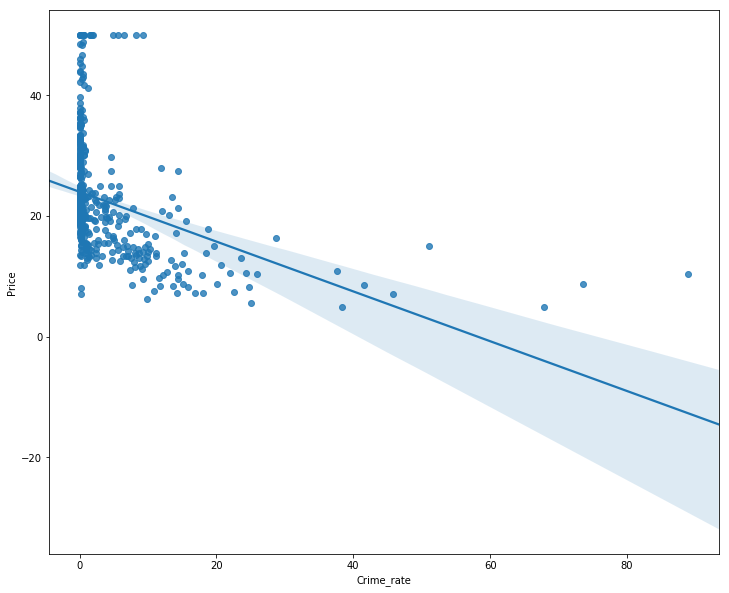

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Crime_rate", y="Price", data=df)

In [41]:
mlr=LinearRegression()
X=df[['WDCA','PIRH','Tax_rate']]
Z=df['Price']

In [42]:
mlr.fit(X,Z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print(mlr.intercept_,mlr.coef_)

35.571007279509615 [ 1.01266037e-02  2.76359082e-01 -2.73710039e+01]


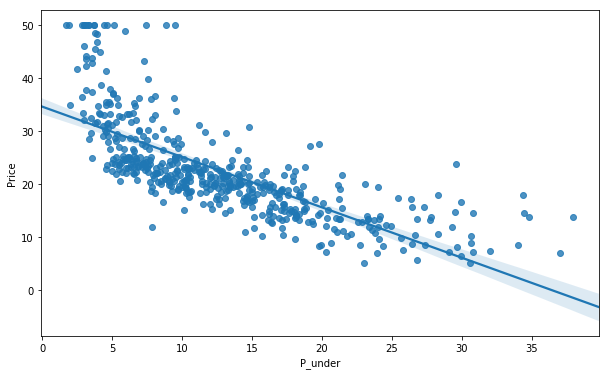

In [44]:
width = 10
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="P_under", y="Price", data=df)

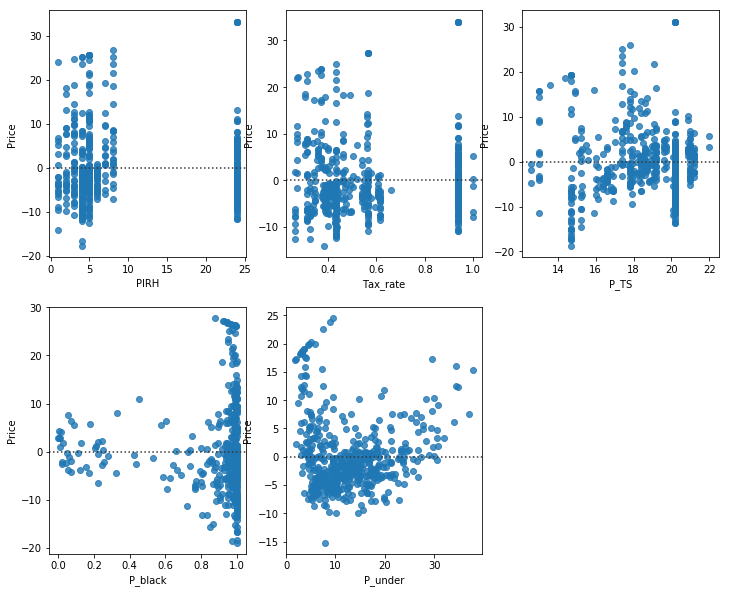

In [45]:
width = 12
height = 10
col5=['PIRH','Tax_rate','P_TS','P_black','P_under']
plt.figure(figsize=(width, height))
for i in range(5):
    plt.subplot(2,3,i+1)             #'PIRH', 'Tax_rate'  'P_TS' 'P_black'  'P_under'
    sns.residplot(df[col5[i]], df['Price'])
plt.show()

In [46]:
Yhat=mlr.predict(X)

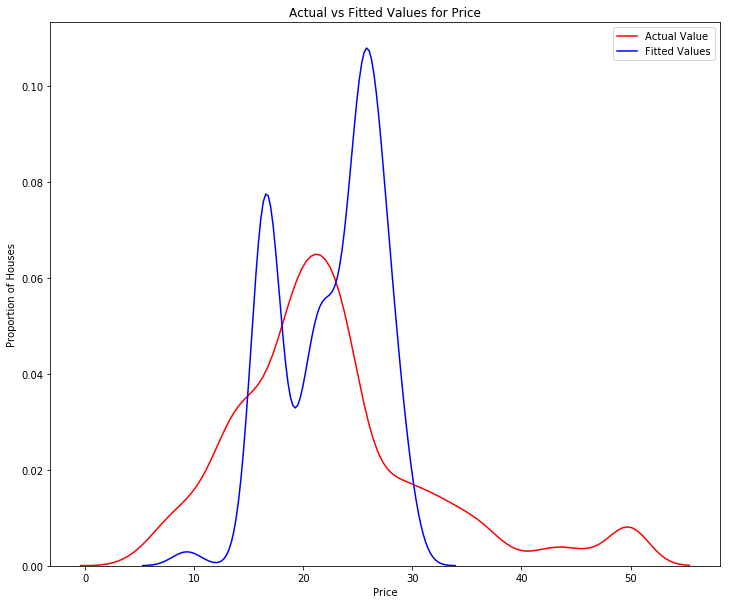

In [47]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

In [48]:
xp = df['Crime_rate']
yp = df['Price']
f = np.polyfit(xp, yp, 3)
p = np.poly1d(f)
yphat=p(xp)
print(p)

            3          2
-0.0001466 x + 0.0235 x - 1.127 x + 25.16


In [49]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max() , 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of houses')
   
    plt.show()
    plt.close()

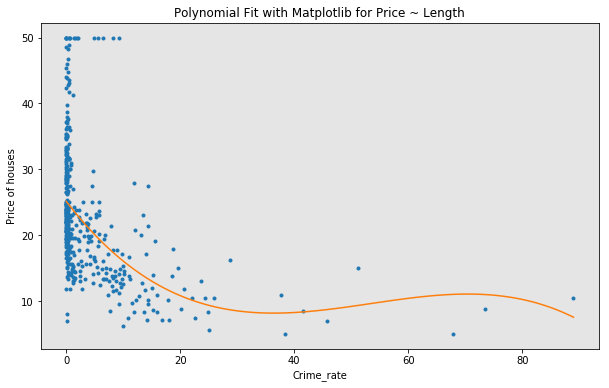

In [50]:
plt.figure(figsize=(10,6))
PlotPolly(p, xp, yp, 'Crime_rate')

In [51]:
# 模型(属性,价格实际值,价格预测值)   lr(x,y,yhat) mlr(X,Z,Yhat)  f,p(xp,yp,yphat)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#计算score
score1=lr.score(x,y)
score2=mlr.score(X,Z)
score3=r2_score(yp,yphat)

#计算MSE 
mse1= mean_squared_error(y, yhat)
mse2 = mean_squared_error(Z, Yhat)
mse3 = mean_squared_error(yp, Yhat)

print('='*20,'LRM','='*30,'\nR^2: ',score1,'\tMSE: ',mse1,sep='')
print('='*20,'MLRM','='*30,'\nR^2: ',score2,'\tMSE: ',mse2,sep='')
print('='*20,'PRM','='*30,'\nR^2: ',score3,'\tMSE: ',mse3,sep='')



====================LRM==============================
R^2: 0.14886609291873587	MSE: 71.85234666526337
====================MLRM==============================
R^2: 0.23125895800765392	MSE: 64.89677756402207
====================PRM==============================
R^2: 0.21431362431132372	MSE: 64.89677756402207


In [52]:

attributes=['P_under','ANR','P_TS','P_NRL','Tax_rate','NOC']
           #,'Crime_rate','PIRH','P_SUH','P_black','P_RL']

<h1>3.5.1</h1>

In [69]:
#寻找一元线性拟合的一个最优属性值
lr=LinearRegression()
def slrfun(x,y,yhat):
    score=lr.score(x,y)
    mse= mean_squared_error(y, yhat)
    return score,mse;
slr_r2_mse=[]
for i in range(len(attributes)):
    lr.fit(df[[attributes[i]]],df['Price'])
    yhat=lr.predict(df[[attributes[i]]])
    temp=slrfun(x,y,yhat)
    slr_r2_mse.append([attributes[i],temp])
slr_r2_mse

    

[['P_under', (-0.980827143144875, 38.48296722989414)],
 ['ANR', (-86.05720372239588, 43.60055177116958)],
 ['P_TS', (-14.684792198763288, 62.65220001376927)],
 ['P_NRL', (-0.1831142637487857, 64.6662216410753)],
 ['Tax_rate', (-311.3202925613689, 65.88727533683914)],
 ['NOC', (-1106.4180049111974, 69.00428835540669)]]

<h3>比较R^2和mse得，P_under属性较为适合简单一元线性模型</h3>

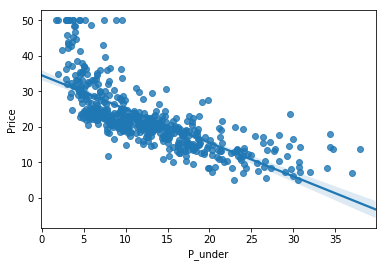

In [54]:
sns.regplot(x='P_under',y='Price',data=df)

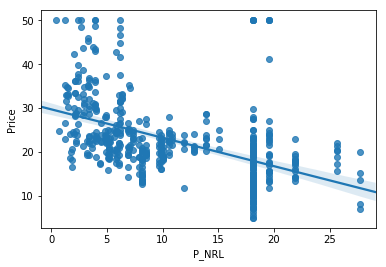

In [55]:
sns.regplot(x='P_NRL',y='Price',data=df)

<h1>3.5.2</h1>

In [129]:
#选两种最优属性,attributes为上述定义(attributes=['P_under','ANR','P_TS','P_NRL','Tax_rate','NOC'])
min_mlr_r2=[(0,),float('inf')]
min_mlr_mse=[(0,),float('inf')]
min_mlr_sum=[(0,),float('inf')]
for i in range(len(attributes)):
    for j in range(len(attributes)):
        x=df[[attributes[i],attributes[j]]]; y=df['Price']
        mlr.fit(x,y)
        yhat=mlr.predict(x)
        if abs(mlr.score(x,y)-1)<abs(min_mlr_r2[1]-1):
            min_mlr_r2=[(i,j),mlr.score(x,y)]
        if abs(mean_squared_error(y, yhat))<abs(min_mlr_mse[1]):
            min_mlr_mse=[(i,j),mean_squared_error(y, yhat)]
        #print(abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)))
        if (abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)-1)) < abs(min_mlr_sum[1]):
            min_mlr_sum=[(i,j),abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y))]
print(min_mlr_r2)
print(min_mlr_mse)
print(min_mlr_sum)


[(0, 1), 0.6385616062603403]
[(1, 0), 30.51246877729947]
[(1, 0), 31.15103038355981]


In [128]:
#选三种最优属性
min_mlr_r2=[(0,),float('inf')]
min_mlr_mse=[(0,),float('inf')]
min_mlr_sum=[(0,),float('inf')]
for k1 in range(len(attributes)):
    for k2 in range(len(attributes)):
        for k3 in range(len(attributes)):
            x=df[[attributes[k1],attributes[k2],attributes[k3]]]; y=df['Price']
            mlr.fit(x,y)
            yhat=mlr.predict(x)
            if abs(mlr.score(x,y)-1)<abs(min_mlr_r2[1]-1):
                min_mlr_r2=[(k1,k2,k3),mlr.score(x,y)]
            if abs(mean_squared_error(y, yhat))<abs(min_mlr_mse[1]):
                min_mlr_mse=[(k1,k2,k3),mean_squared_error(y, yhat)]
            #print(abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)))
            if (abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)-1)) < abs(min_mlr_sum[1]):
                min_mlr_sum=[(k1,k2,k3),abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y))]
print(min_mlr_r2)
print(min_mlr_mse)
print(min_mlr_sum)

[(0, 2, 1), 0.6786241601613112]
[(0, 2, 1), 27.13040575849706]
[(2, 1, 0), 27.809029918658375]


In [127]:
#选四种最优属性
min_mlr_r2=[(0,),float('inf')]
min_mlr_mse=[(0,),float('inf')]
min_mlr_sum=[(0,),float('inf')]
for k1 in range(len(attributes)):
    for k2 in range(len(attributes)):
        for k3 in range(len(attributes)):
            for k4 in range(len(attributes)):
                x=df[[attributes[k1],attributes[k2],attributes[k3],attributes[k4]]]; y=df['Price']
                mlr.fit(x,y)
                yhat=mlr.predict(x)
                if abs(mlr.score(x,y)-1)<abs(min_mlr_r2[1]-1):
                    min_mlr_r2=[(k1,k2,k3,k4),mlr.score(x,y)]
                if abs(mean_squared_error(y, yhat))<abs(min_mlr_mse[1]):
                    min_mlr_mse=[(k1,k2,k3,k4),mean_squared_error(y, yhat)]
                #print(abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)))
                if (abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)-1)) < abs(min_mlr_sum[1]):
                    min_mlr_sum=[(k1,k2,k3,k4),abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y))]
print(min_mlr_r2)
print(min_mlr_mse)
print(min_mlr_sum)

[(2, 0, 1, 4), 0.6796626444104408]
[(2, 0, 1, 4), 27.042737379110374]
[(5, 2, 1, 0), 27.76057096430276]


In [126]:
#选五种最优属性
min_mlr_r2=[(0,),float('inf')]
min_mlr_mse=[(0,),float('inf')]
min_mlr_sum=[(0,),float('inf')]
for k1 in range(len(attributes)):
    for k2 in range(len(attributes)):
        for k3 in range(len(attributes)):
            for k4 in range(len(attributes)):
                for k5 in range(len(attributes)):
                    x=df[[attributes[k1],attributes[k2],attributes[k3],attributes[k4],attributes[k5]]]; y=df['Price']
                    mlr.fit(x,y)
                    yhat=mlr.predict(x)
                    if abs(mlr.score(x,y)-1)<abs(min_mlr_r2[1]-1):
                        min_mlr_r2=[(k1,k2,k3,k4,k5),mlr.score(x,y)]
                    if abs(mean_squared_error(y, yhat))<abs(min_mlr_mse[1]):
                        min_mlr_mse=[(k1,k2,k3,k4,k5),mean_squared_error(y, yhat)]
                    #print(abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)))
                    if (abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y)-1)) < abs(min_mlr_sum[1]):
                        min_mlr_sum=[(k1,k2,k3,k4,k5),abs(mean_squared_error(y, yhat))+abs(mlr.score(x,y))]
print(min_mlr_r2)
print(min_mlr_mse)
print(min_mlr_sum)

[(4, 1, 2, 0, 3), 0.6804097741290726]
[(4, 1, 2, 0, 3), 26.979665019872392]
[(5, 5, 2, 1, 0), 27.76057096430277]


In [111]:
# 全部属性6个
x=df[attributes]
y=df['Price']
mlr.fit(x,y)
yhat=mlr.predict(x)
s1=mlr.score(x,y)
mse1=mean_squared_error(y,yhat)
print(s1,mse1,s1+mse1)

0.6810217497396301 26.928002310450722 27.609024060190354


          P_under         ANR        P_TS       P_NRL    Tax_rate         NOC
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
mean    12.653063    6.284634   18.455534   11.136779    0.574173    0.554695
std      7.141062    0.702617    2.164946    6.860353    0.237042    0.115878
min      1.730000    3.561000   12.600000    0.460000    0.263010    0.385000
25%      6.950000    5.885500   17.400000    5.190000    0.392405    0.449000
50%     11.360000    6.208500   19.050000    9.690000    0.464135    0.538000
75%     16.955000    6.623500   20.200000   18.100000    0.936709    0.624000
max     37.970000    8.780000   22.000000   27.740000    1.000000    0.871000


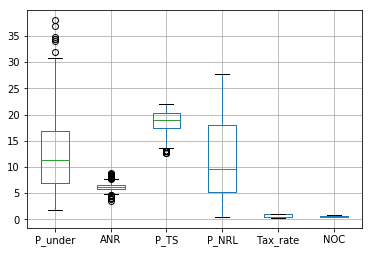

           P_under       ANR      P_TS     P_NRL  Tax_rate       NOC
P_under   1.000000 -0.613808  0.374044  0.603800  0.543993  0.590879
ANR      -0.613808  1.000000 -0.355501 -0.391676 -0.292048 -0.302188
P_TS      0.374044 -0.355501  1.000000  0.383248  0.460853  0.188933
P_NRL     0.603800 -0.391676  0.383248  1.000000  0.720760  0.763651
Tax_rate  0.543993 -0.292048  0.460853  0.720760  1.000000  0.668023
NOC       0.590879 -0.302188  0.188933  0.763651  0.668023  1.000000


In [56]:
print(df[attributes].describe())

df[attributes].boxplot()
plt.savefig("boxplot.jpg")
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print(df[attributes].corr())


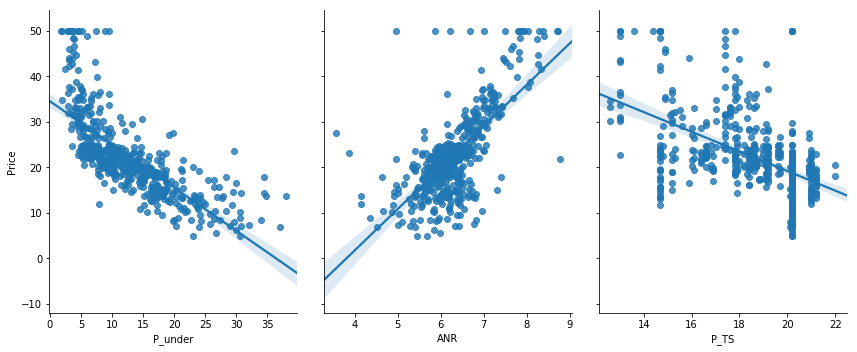

In [57]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=attributes[0:3], y_vars='Price', height=5, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

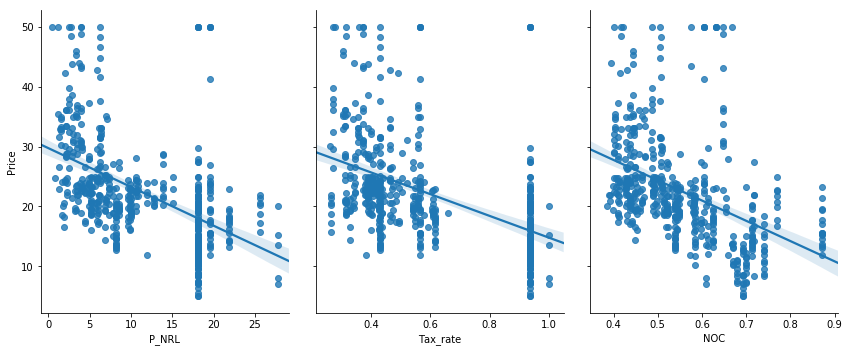

In [58]:
sns.pairplot(df, x_vars=attributes[3:], y_vars='Price', height=5, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

<h5>保留前三个特征，将后三个特征去掉</h5>

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df[attributes],df['Price'],test_size=.20)

print("原始数据特征:",df[attributes].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)

print("原始数据标签:",df[attributes].shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)


原始数据特征: (506, 6) ,训练数据特征: (404, 6) ,测试数据特征: (102, 6)
原始数据标签: (506, 6) ,训练数据标签: (404,) ,测试数据标签: (102,)


In [114]:
model = LinearRegression()
model.fit(X_train,Y_train)

a  = model.intercept_#截距
b = model.coef_#回归系数

print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 21.885562147755216 ,回归系数： [-0.57784503  4.19293474 -0.90563246  0.10234439 -2.76450832 -2.26722093]


R^2:  0.7952016945303008 MSE:  16.736572827175046


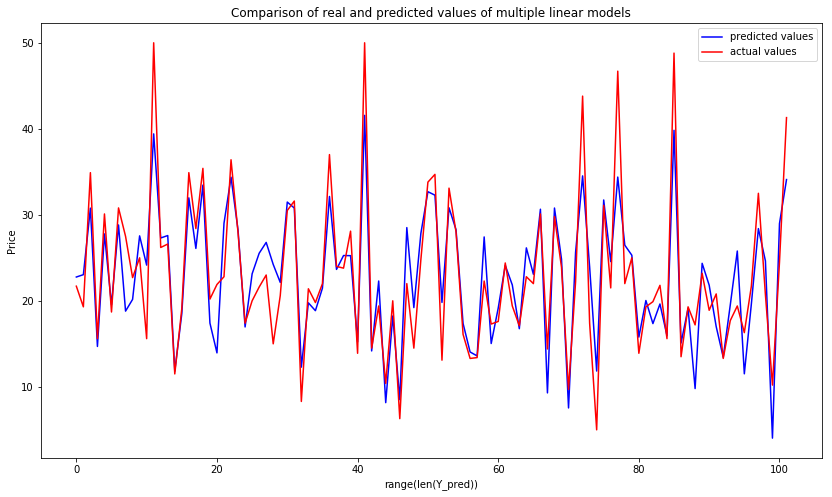

In [115]:
score = model.score(X_test,Y_test)
Y_pred = model.predict(X_test)

print('R^2: ',score,'MSE: ',mean_squared_error(Y_test,Y_pred))

#对线性回归进行预测
#print(Y_pred)

plt.figure(figsize=(14,8))
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predicted values",color='blue')
plt.plot(range(len(Y_test)),Y_test,'b',label="actual values",color='red')

plt.title('Comparison of real and predicted values of multiple linear models')
plt.xlabel('range(len(Y_pred))')
plt.ylabel('Price')
plt.legend()
#显示图像
plt.savefig("predict.jpg")
plt.show()


<h5>R^2:  0.6846752962087899 MSE:  20.91439530120947    </h5>

<h1>3.5.3</h1>

In [70]:
#寻找多项式拟合的一个最优属性值
def polyfun(x,y,yhat):
    score=r2_score(x,y)
    mse= mean_squared_error(y, yhat)
    return score,mse;
plr_r2_mse=[]
for i in range(len(attributes)):
    attrs=df[attributes[i]]
    f = np.polyfit(attrs, df['Price'], 3)
    p = np.poly1d(f)
    yphat=p(attrs)
    temp=polyfun(attrs,df['Price'],yhat)
    plr_r2_mse.append([attributes[i],temp])
plr_r2_mse

[['P_under', (-5.476727649896687, 69.00428835540669)],
 ['ANR', (-688.9726249134172, 69.00428835540669)],
 ['P_TS', (-25.915381231431965, 69.00428835540669)],
 ['P_NRL', (-5.85909379942344, 69.00428835540669)],
 ['Tax_rate', (-10140.155855735797, 69.00428835540669)],
 ['NOC', (-42411.89177563165, 69.00428835540669)]]

In [63]:
def myPlotPollyfun(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max() , 100)
    y_new = model(x_new)
    print('R^2: ',r2_score(dependent_variabble,model(independent_variable)))
    print( 'MSE: ',mean_squared_error(dependent_variabble,model(independent_variable)))

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of houses')
   
    plt.show()
    plt.close()

<h3>比较R^2和mse得，P_under属性较为适合多项式模型</h3>

R^2:  0.6578476405895719
MSE:  28.884350319213173


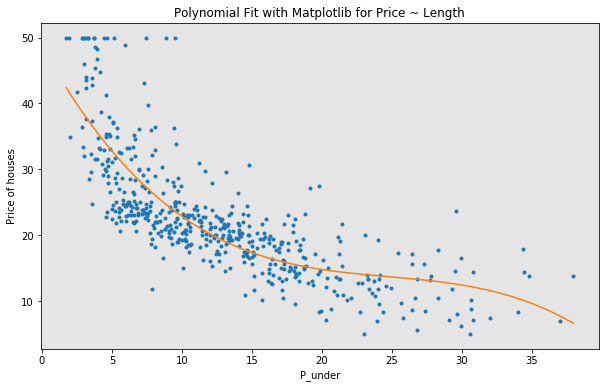

In [64]:
plt.figure(figsize=(10,6))
xp=df['P_under']
yp=df['Price']
f = np.polyfit(xp, df['Price'], 3)
p = np.poly1d(f)
myPlotPollyfun(p, xp, yp, 'P_under')
